# Desafío - Expansiones basales

● Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:
    
    ○ El desafío se debe desarrollar de manera Individual.
    
    ○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Expansiones basales.

## Descripción

● Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.

● Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.

● Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo

● Importe los módulos clásicos del trabajo en ciencia de datos.

● El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere estadísticas descriptivas.

● En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM.

In [30]:
#!pip install ipywidgets
#!pip install pandas-profiling
#!pip install lazypredict
#!pip install plotly.express

In [31]:
# importación de librerias
# librerias clasicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

# analisis exploratorio 
from pandas_profiling import ProfileReport

# librerias de machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from pygam import LinearGAM, s

# librerias LazyPredict

#import lazypredict as lz

from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

# otros
import plotly.express as px
labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('seaborn-darkgrid')
import func as fx

In [32]:
# cargamos el archivos compresive_strength_concrete.csv en nuestro DataSet
df = pd.read_csv('compresive_strength_concrete.csv')
# visualizamos los primeros 10 registros del df
df.head(10)

Cement (component 1)(kg in a m^3 mixture)  \
0                                     540.00   
1                                     540.00   
2                                     332.50   
3                                     332.50   
4                                     198.60   
5                                     266.00   
6                                     380.00   
7                                     380.00   
8                                     266.00   
9                                     475.00   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                               0.00       
1                                               0.00       
2                                             142.50       
3                                             142.50       
4                                             132.40       
5                                             114.00       
6                                              95.00       
7                                              95.00       
8                                             114.00       
9                                               0.00       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                        0.00   
1                                        0.00   
2                                        0.00   
3                                        0.00   
4                                        0.00   
5                                        0.00   
6                                        0.00   
7                                        0.00   
8                                        0.00   
9                                        0.00   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                     162.00   
1                                     162.00   
2                                     228.00   
3                                     228.00   
4                                     192.00   
5                                     228.00   
6                                     228.00   
7                                     228.00   
8                                     228.00   
9                                     228.00   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                               2.50     
1                                               2.50     
2                                               0.00     
3                                               0.00     
4                                               0.00     
5                                               0.00     
6                                               0.00     
7                                               0.00     
8                                               0.00     
9                                               0.00     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                            1040.00      
1                                            1055.00      
2                                             932.00      
3                                             932.00      
4                                             978.40      
5                                             932.00      
6                                             932.00      
7                                             932.00      
8                                             932.00      
9                                             932.00      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                             676.00         28   
1                                             676.00         28   
2                                             594.00        270   
3                                             594.00        365   
4                                             825.50        360   
5                                             670.00 

In [33]:
# generamos estadisticas descriptivas
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                    1030.00   
mean                                      281.17   
std                                       104.51   
min                                       102.00   
25%                                       192.38   
50%                                       272.90   
75%                                       350.00   
max                                       540.00   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                            1030.00       
mean                                               73.90       
std                                                86.28       
min                                                 0.00       
25%                                                 0.00       
50%                                                22.00       
75%                                               142.95       
max                                               359.40       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                     1030.00   
mean                                        54.19   
std                                         64.00   
min                                          0.00   
25%                                          0.00   
50%                                          0.00   
75%                                        118.30   
max                                        200.10   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                    1030.00   
mean                                      181.57   
std                                        21.35   
min                                       121.80   
25%                                       164.90   
50%                                       185.00   
75%                                       192.00   
max                                       247.00   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                            1030.00     
mean                                                6.20     
std                                                 5.97     
min                                                 0.00     
25%                                                 0.00     
50%                                                 6.40     
75%                                                10.20     
max                                                32.20     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                            1030.00      
mean                                              972.92      
std                                                77.75      
min                                               801.00      
25%                                               932.00      
50%                                               968.00      
75%                                              1029.40      
max                                              1145.00      

       Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
count                                            1030.00    1030.00   
mean                                              773.58      45.66   
std                                                80.18      63.17   
min                                               594.00       1.00   
25%                                               730.95       7.00   
50%                                               779.50      28.00   
75%                                               824.00      56.00   
max                                               992.60     365.00   

       Concrete compressive strength(MPa, megapascals)   
count                                           1030.00  
mean                                              35.82  
std                                               16.71  
min            

## Ejercicio 2: Descripción

● El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals)

● Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.

● Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos.

In [34]:
# Limpieza de cararcteres en nombre de las variables, para eliminar espacios, mayusculas y parentesis
df.columns = df.columns.map(lambda x: str(x).lower().replace(' ', '_'))
df.columns = df.columns.map(lambda x: str(x).lower().replace('(', ''))
df.columns = df.columns.map(lambda x: str(x).lower().replace(')', ''))

In [35]:
# Cambio de nombres a variables
df = df.rename(columns={'cement_component_1kg_in_a_m^3_mixture':'cement',
                        'blast_furnace_slag_component_2kg_in_a_m^3_mixture':'blast_furnace',
                        'fly_ash_component_3kg_in_a_m^3_mixture':'fly_ash',
                        'water__component_4kg_in_a_m^3_mixture':'water',
                        'superplasticizer_component_5kg_in_a_m^3_mixture':'superplasticizer',
                        'coarse_aggregate__component_6kg_in_a_m^3_mixture':'coarse_aggregate',
                        'fine_aggregate_component_7kg_in_a_m^3_mixture':'fine_aggregate',
                        'age_day':'age',
                        'concrete_compressive_strengthmpa,_megapascals_':'concrete'})

df.head()

cement  blast_furnace  fly_ash  water  superplasticizer  coarse_aggregate  \
0  540.00           0.00     0.00 162.00              2.50           1040.00   
1  540.00           0.00     0.00 162.00              2.50           1055.00   
2  332.50         142.50     0.00 228.00              0.00            932.00   
3  332.50         142.50     0.00 228.00              0.00            932.00   
4  198.60         132.40     0.00 192.00              0.00            978.40   

   fine_aggregate  age  concrete  
0          676.00   28     79.99  
1          676.00   28     61.89  
2          594.00  270     40.27  
3          594.00  365     41.05  
4          825.50  360     44.30

In [36]:
# revisamos la dimensionalidad del dataset
print(f'''El dataset contiene
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

El dataset contiene
Numero de filas: 1030
Numero de columnas: 9


<AxesSubplot:>

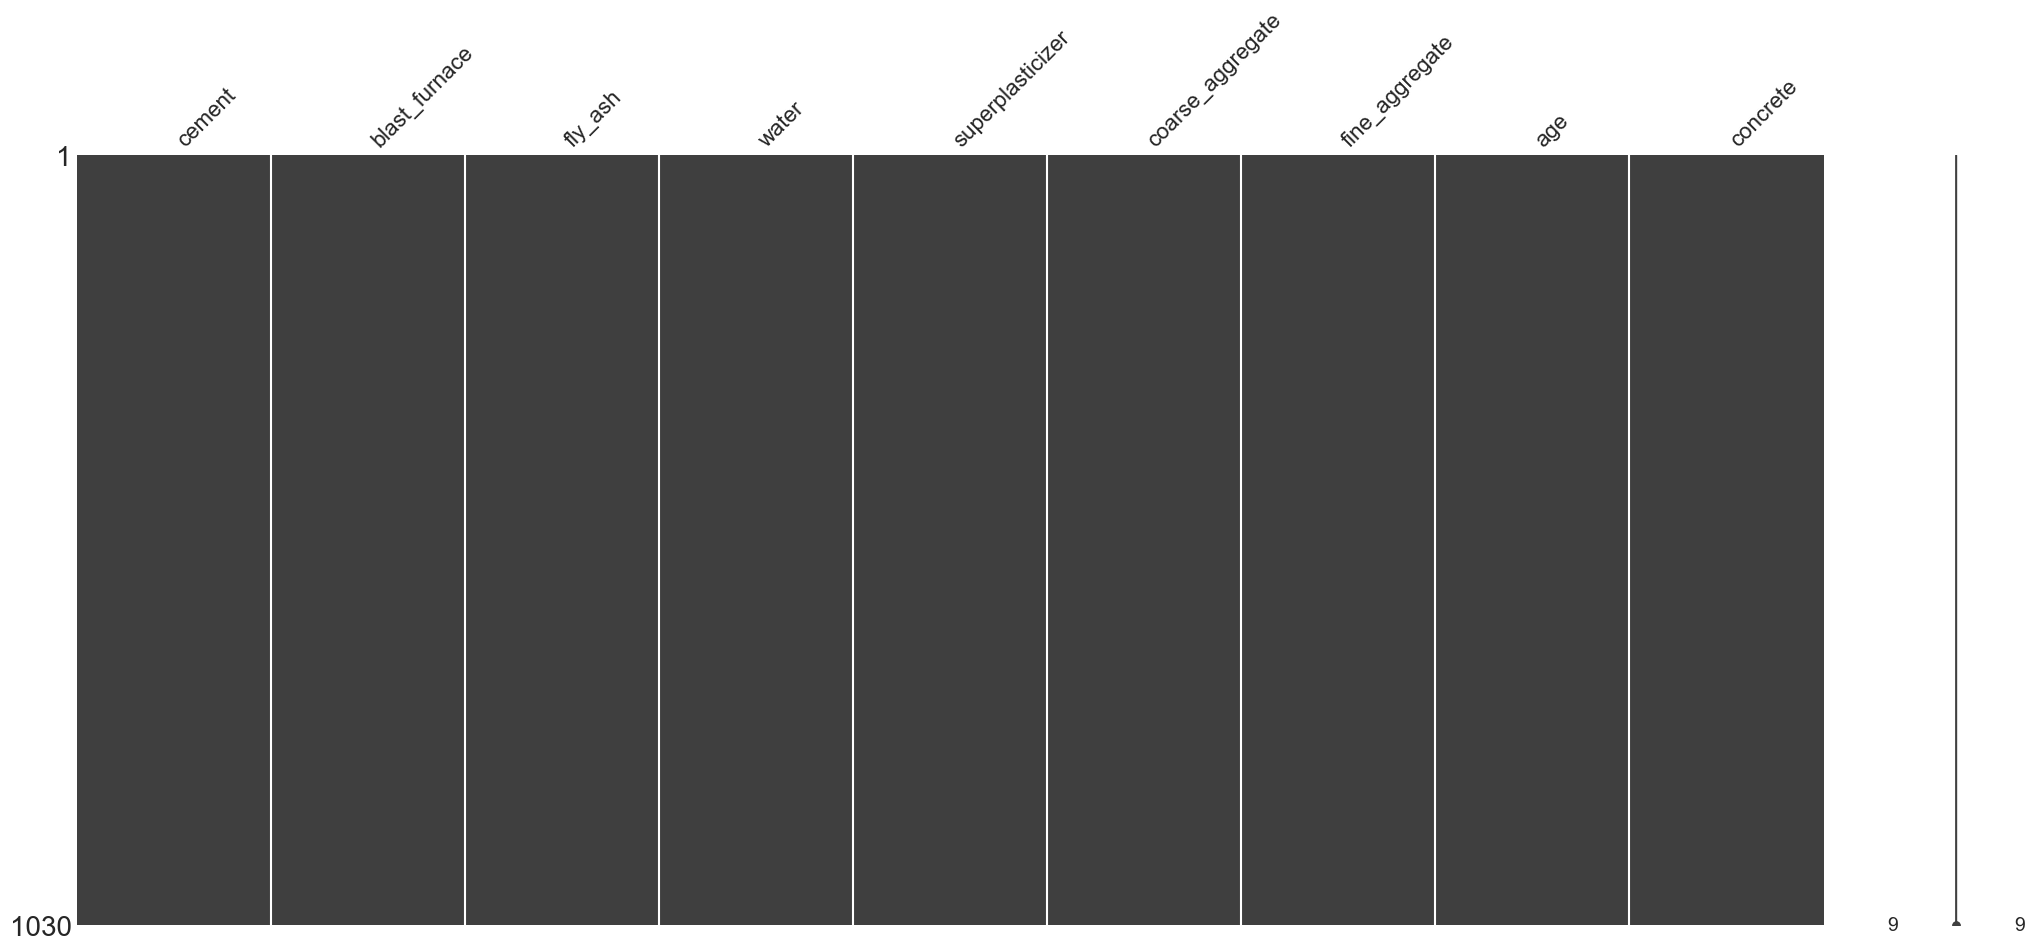

In [37]:
# revisamos que no existan datos perdidos
msngo.matrix(df)

In [38]:
# revisamos el tipo de datos de cada una de las columnas
df.dtypes

cement              float64
blast_furnace       float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age                   int64
concrete            float64
dtype: object

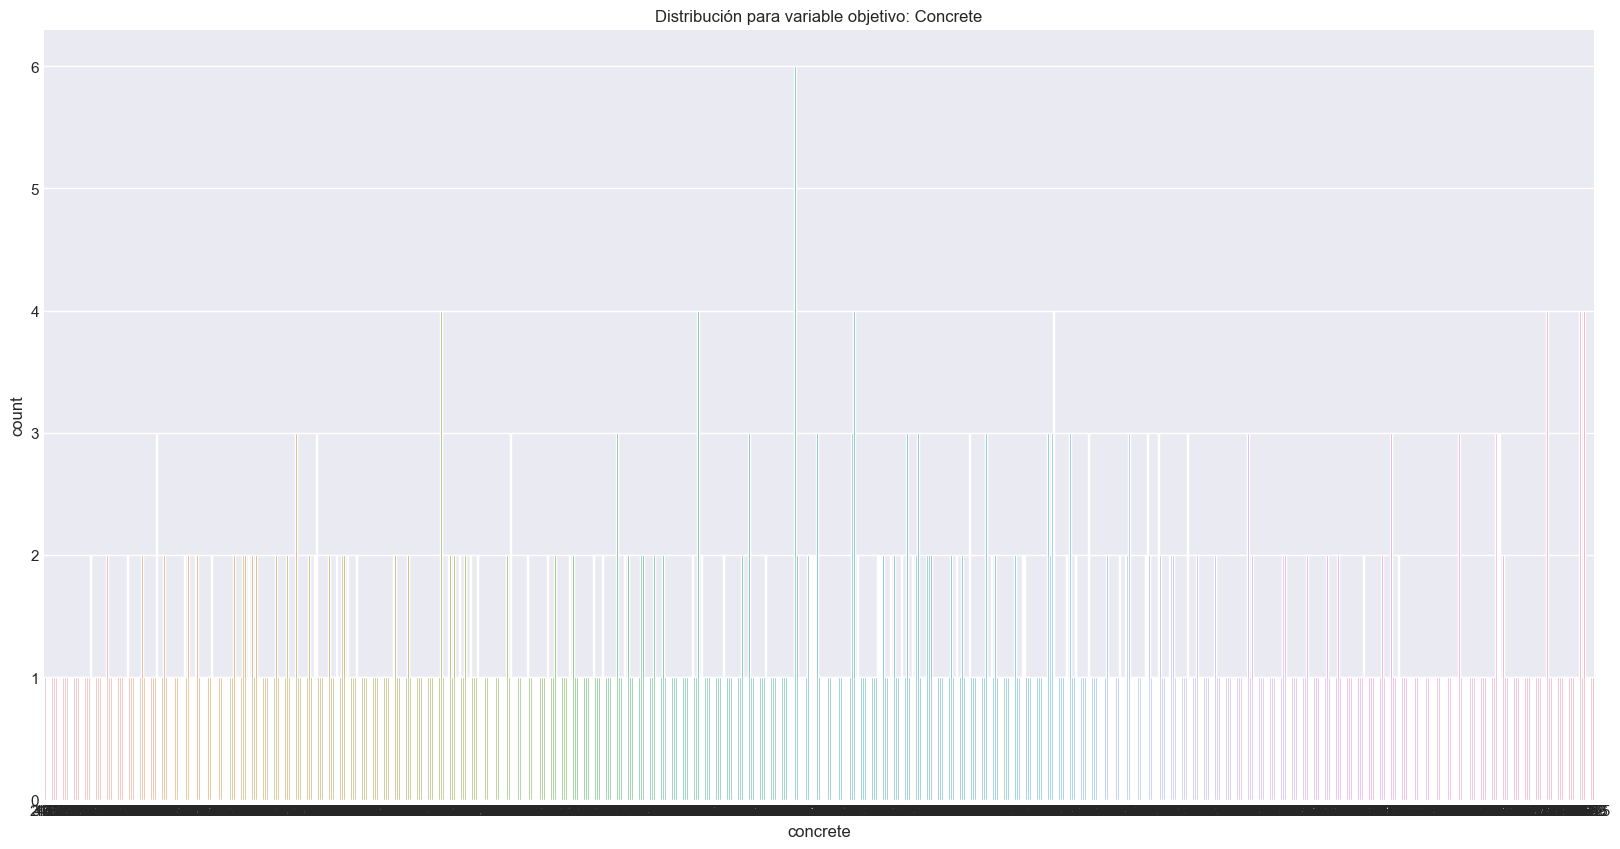

In [39]:
sns.countplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: Concrete')
plt.show()

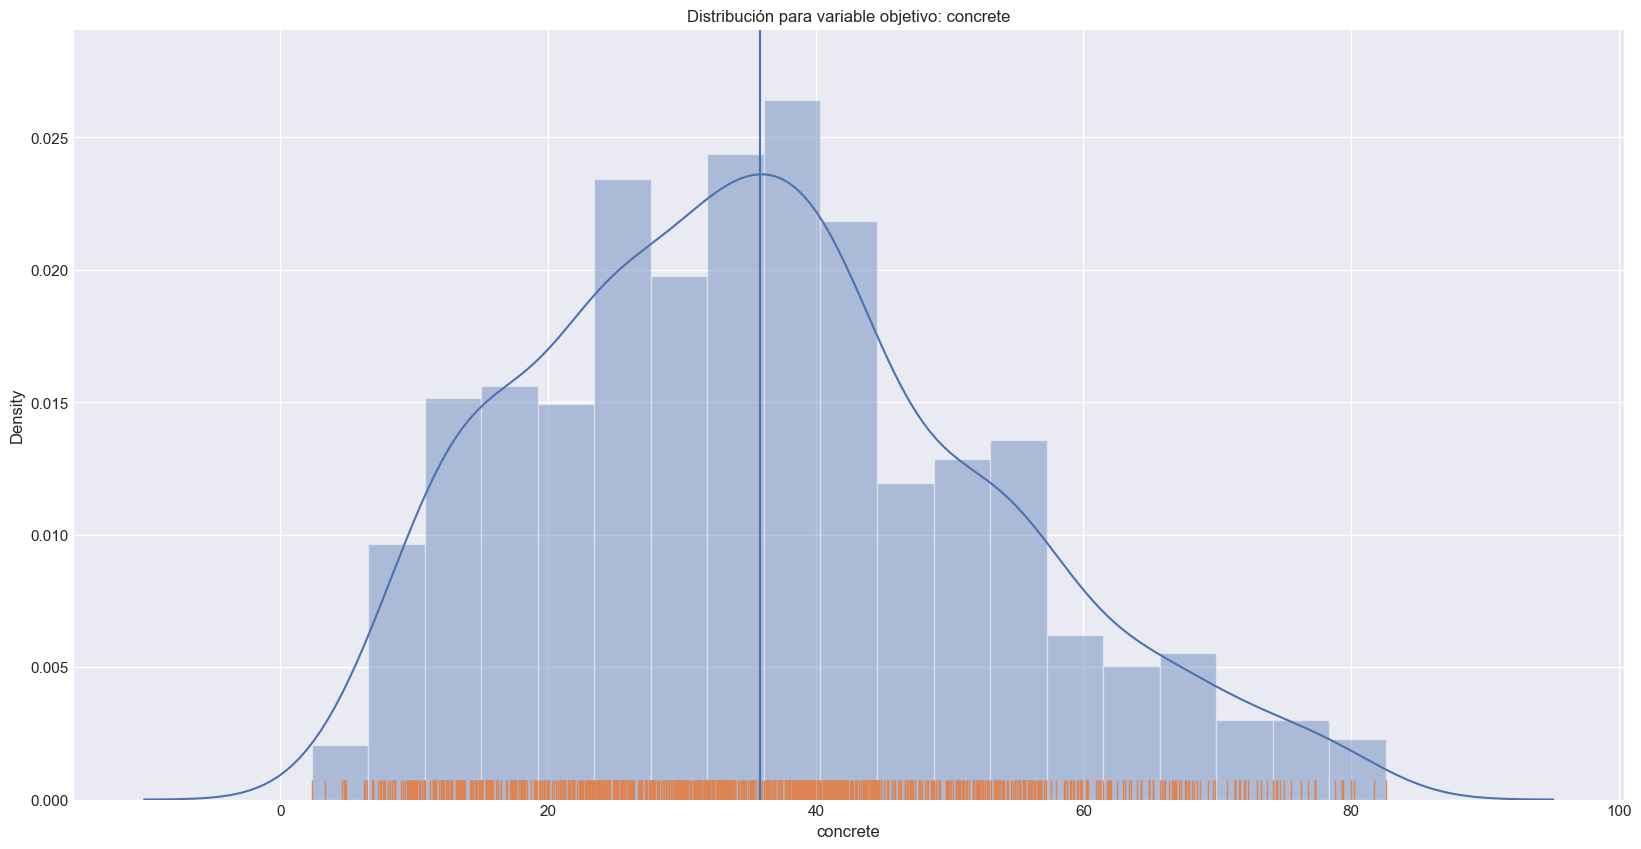

In [40]:
# Visualizacion distribucion vector objetivo
sns.distplot(x = df['concrete'])
sns.rugplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: concrete')
plt.axvline(df['concrete'].mean())
plt.show()

In [41]:
# Analisis exploratorio mediante ProfileReport de Pandas.
perfil = ProfileReport(df, title="Reporte")

In [42]:
perfil.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# mostramos la composición del dataset, indicando en detalle cada una de las caracteristicas de las columnas.
fx.summary_drop(df)

tipo  nulos  porc_nulos  ceros  porc_ceros   count  \
age                 int64      0        0.00      0        0.00 1030.00   
cement            float64      0        0.00      0        0.00 1030.00   
blast_furnace     float64      0        0.00    471        0.46 1030.00   
fly_ash           float64      0        0.00    566        0.55 1030.00   
water             float64      0        0.00      0        0.00 1030.00   
superplasticizer  float64      0        0.00    379        0.37 1030.00   
coarse_aggregate  float64      0        0.00      0        0.00 1030.00   
fine_aggregate    float64      0        0.00      0        0.00 1030.00   
concrete          float64      0        0.00      0        0.00 1030.00   

                   mean    std    min    25%    50%     75%     max  dist_IQR  \
age               45.66  63.17   1.00   7.00  28.00   56.00  365.00     49.00   
cement           281.17 104.51 102.00 192.38 272.90  350.00  540.00    157.62   
blast_furnace     73.90  86.28   0.00   0.00  22.00  142.95  359.40    142.95   
fly_ash           54.19  64.00   0.00   0.00   0.00  118.30  200.10    118.30   
water            181.57  21.35 121.80 164.90 185.00  192.00  247.00     27.10   
superplasticizer   6.20   5.97   0.00   0.00   6.40   10.20   32.20     10.20   
coarse_aggregate 972.92  77.75 801.00 932.00 968.00 1029.40 1145.00     97.40   
fine_aggregate   773.58  80.18 594.00 730.95 779.50  824.00  992.60     93.05   
concrete          35.82  16.71   2.33  23.71  34.45   46.14   82.60     22.43   

                  limit_inf  limit_sup  outliers  
age                  -66.50     129.50        59  
cement               -44.06     586.44         0  
blast_furnace       -214.42     357.38         2  
fly_ash             -177.45     295.75         0  
water                124.25     232.65         9  
superplasticizer     -15.30      25.50        10  
coarse_aggregate     785.90    1175.50         0  
fine_aggregate       591.38     963.57         5  
concrete              -9.93      79.77         4

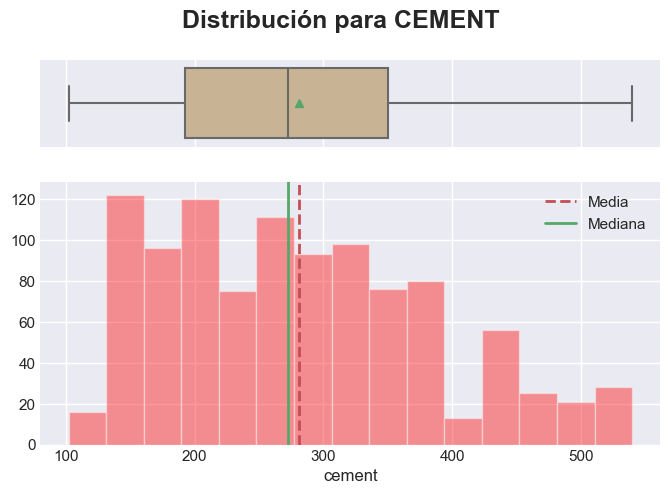

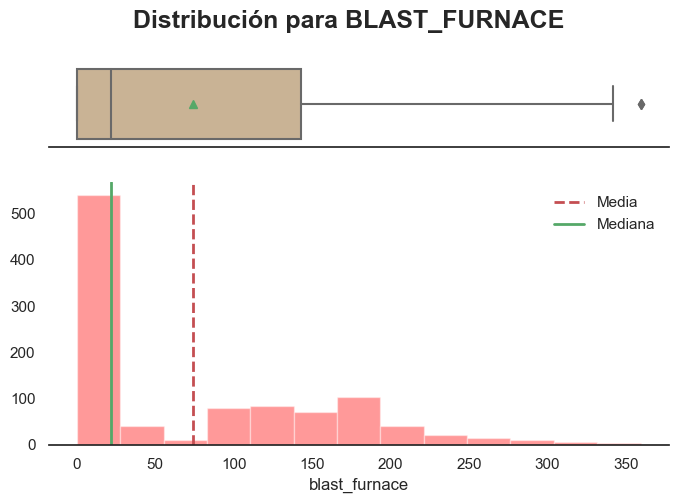

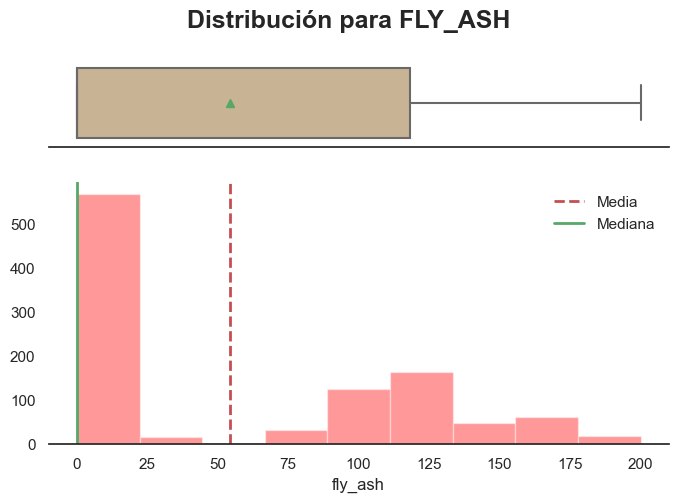

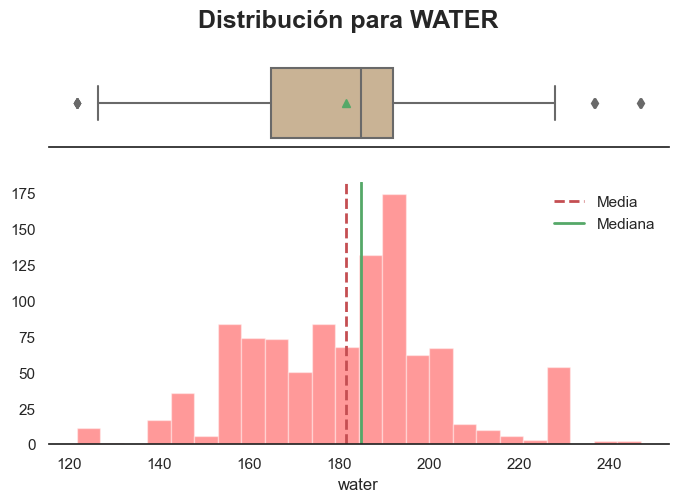

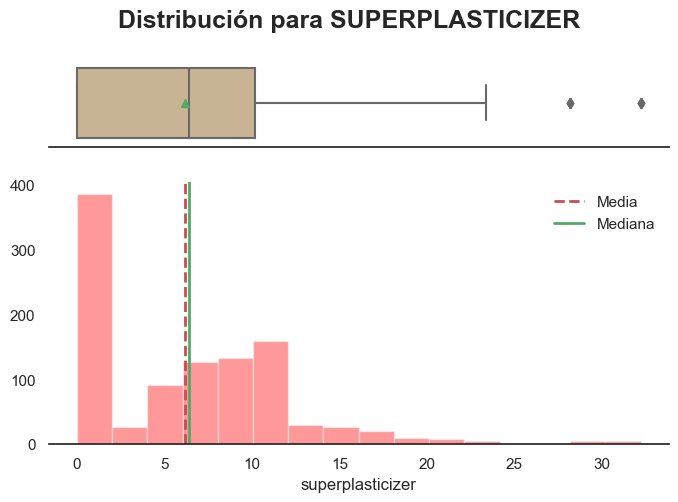

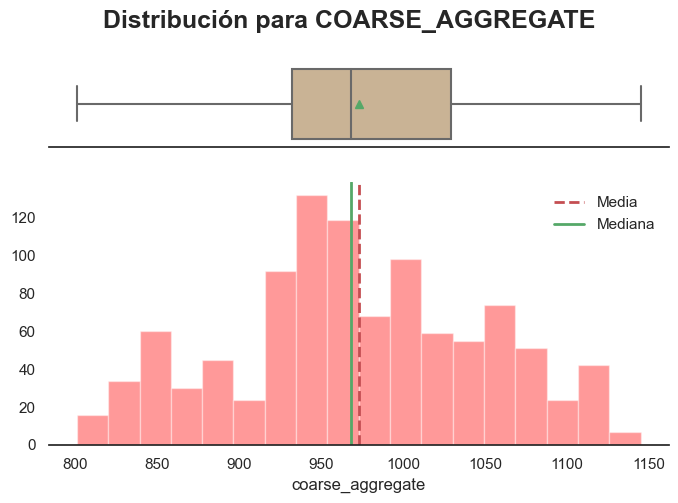

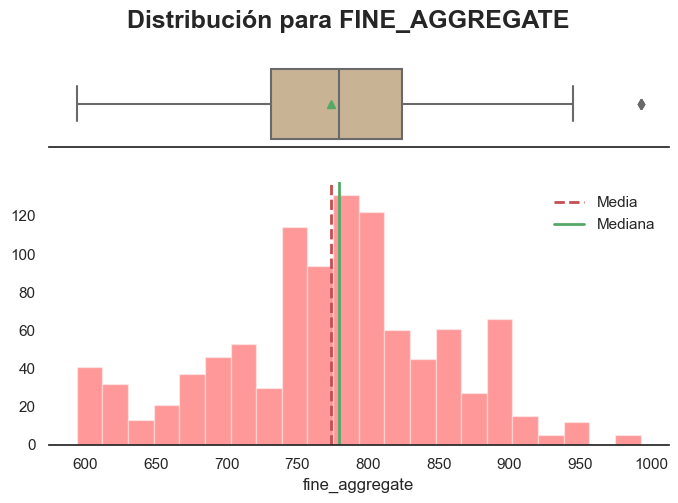

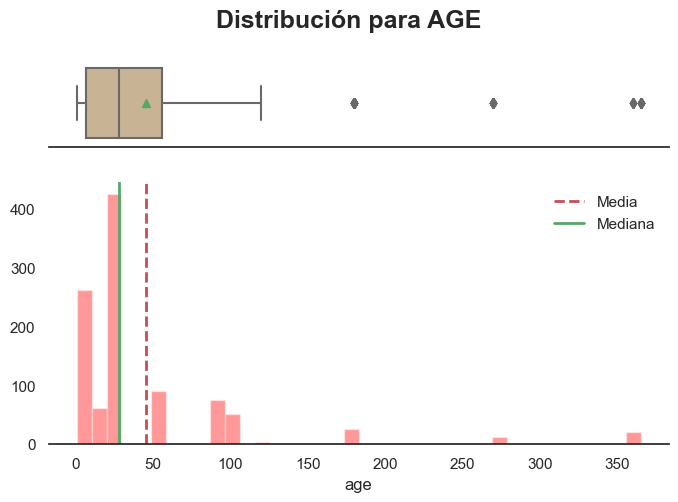

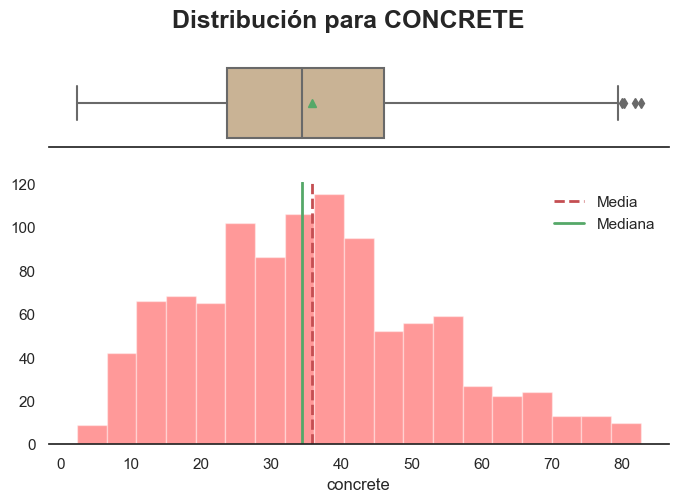

In [44]:
list_vars = ['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete']

for i in range(len(list_vars)):
        fx.dist_box(df[list_vars[i]])

## Ejercicio 3: Modelo
● En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional a esto, importe las métricas de desempeño asociadas.

● Genere conjuntos de entrenamiento y validación.

● Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper parámetro lam así como las métricas de desempeño asociadas.

● Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [45]:
fx.summary_drop(df)

tipo  nulos  porc_nulos  ceros  porc_ceros   count  \
age                 int64      0        0.00      0        0.00 1030.00   
cement            float64      0        0.00      0        0.00 1030.00   
blast_furnace     float64      0        0.00    471        0.46 1030.00   
fly_ash           float64      0        0.00    566        0.55 1030.00   
water             float64      0        0.00      0        0.00 1030.00   
superplasticizer  float64      0        0.00    379        0.37 1030.00   
coarse_aggregate  float64      0        0.00      0        0.00 1030.00   
fine_aggregate    float64      0        0.00      0        0.00 1030.00   
concrete          float64      0        0.00      0        0.00 1030.00   

                   mean    std    min    25%    50%     75%     max  dist_IQR  \
age               45.66  63.17   1.00   7.00  28.00   56.00  365.00     49.00   
cement           281.17 104.51 102.00 192.38 272.90  350.00  540.00    157.62   
blast_furnace     73.90  86.28   0.00   0.00  22.00  142.95  359.40    142.95   
fly_ash           54.19  64.00   0.00   0.00   0.00  118.30  200.10    118.30   
water            181.57  21.35 121.80 164.90 185.00  192.00  247.00     27.10   
superplasticizer   6.20   5.97   0.00   0.00   6.40   10.20   32.20     10.20   
coarse_aggregate 972.92  77.75 801.00 932.00 968.00 1029.40 1145.00     97.40   
fine_aggregate   773.58  80.18 594.00 730.95 779.50  824.00  992.60     93.05   
concrete          35.82  16.71   2.33  23.71  34.45   46.14   82.60     22.43   

                  limit_inf  limit_sup  outliers  
age                  -66.50     129.50        59  
cement               -44.06     586.44         0  
blast_furnace       -214.42     357.38         2  
fly_ash             -177.45     295.75         0  
water                124.25     232.65         9  
superplasticizer     -15.30      25.50        10  
coarse_aggregate     785.90    1175.50         0  
fine_aggregate       591.38     963.57         5  
concrete              -9.93      79.77         4

In [87]:
# determinamos las columnas de forma aleatoria segun el analisis exploratorio
sub = df[['age','cement','blast_furnace','fly_ash','water','coarse_aggregate','fine_aggregate','superplasticizer']]
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['concrete'], test_size=.3, random_state=71014)

# ajustamos el estandarizador sobre el conjunto de entrenamiento (para que aprenda la media y desv. est.)
scaler = StandardScaler().fit(X_train_pre)

In [88]:
# con el estandarizador ajustamos sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarizacion
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns= X_train_pre.columns)

# transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns= X_test_pre.columns)

In [89]:
multiple_ML_models = LazyRegressor(verbose = 0, ignore_warnings = True, predictions=True)
models, predictions = multiple_ML_models.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:05<00:00,  7.59it/s]


In [90]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.91       0.91  4.93        0.67
LGBMRegressor                                0.91       0.91  4.94        0.07
XGBRegressor                                 0.91       0.91  5.02        0.12
ExtraTreesRegressor                          0.90       0.90  5.26        0.21
RandomForestRegressor                        0.88       0.88  5.62        0.30
GradientBoostingRegressor                    0.88       0.88  5.64        0.13
BaggingRegressor                             0.87       0.87  5.95        0.05
ExtraTreeRegressor                           0.82       0.82  6.94        0.01
DecisionTreeRegressor                        0.78       0.78  7.71        0.01
AdaBoostRegressor                            0.76       0.77  7.94        0.13
KNeighborsRegressor                          0.64       0.65  9.78        0.01
SVR                                          0.61       0.62 10.26        0.06
NuSVR                                        0.58       0.59 10.60        0.04
LarsCV                                       0.54       0.55 11.10        0.02
ElasticNetCV                                 0.54       0.55 11.12        0.06
SGDRegressor                                 0.54       0.55 11.12        0.01
BayesianRidge                                0.54       0.55 11.15        0.01
RidgeCV                                      0.53       0.55 11.16        0.01
Ridge                                        0.53       0.55 11.16        0.01
LassoCV                                      0.53       0.55 11.16        0.07
LassoLarsIC                                  0.53       0.55 11.17        0.01
LassoLarsCV                                  0.53       0.55 11.17        0.02
Lars                                         0.53       0.55 11.17        0.01
TransformedTargetRegressor                   0.53       0.55 11.17        0.01
LinearRegression                             0.53       0.55 11.17        0.01
LinearSVR                                    0.52       0.53 11.34        0.01
HuberRegressor                               0.51       0.52 11.42        0.02
Lasso                                        0.50       0.51 11.56        0.01
OrthogonalMatchingPursuitCV                  0.50       0.51 11.59        0.01
PoissonRegressor                             0.47       0.48 11.93        0.01
ElasticNet                                   0.47       0.48 11.96        0.01
TweedieRegressor                             0.42       0.43 12.47        0.01
GammaRegressor                               0.41       0.42 12.60        0.01
MLPRegressor                                 0.37       0.39 12.96        0.54
PassiveAggressiveRegressor                   0.36       0.37 13.13        0.01
OrthogonalMatchingPursuit                    0.18       0.20 14.82        0.01
QuantileRegressor                           -0.03      -0.00 16.57        2.59
DummyRegressor                              -0.03      -0.00 16.58        0.01
LassoLars                                   -0.03      -0.00 16.58        0.01
RANSACRegressor                             -2.07      -1.99 28.64        0.10
KernelRidge                                 -4.35      -4.21 37.82        0.02
GaussianProcessRegressor                   -19.69     -19.15 74.38        0.05

In [91]:
predictions

AdaBoostRegressor  BaggingRegressor  BayesianRidge  \
0                37.96             42.06          34.45   
1                22.94             15.75          21.32   
2                58.70             66.67          60.43   
3                36.99             28.86          23.21   
4                39.92             38.58          35.42   
..                 ...               ...            ...   
304              20.14             13.61          25.77   
305              33.54             31.07          27.02   
306              37.95             41.89          37.28   
307              24.92             14.11          26.56   
308              37.18             35.82          31.25   

     DecisionTreeRegressor  DummyRegressor  ElasticNet  ElasticNetCV  \
0                    50.60           35.99       35.66         34.33   
1                    16.26           35.99       27.93         21.38   
2                    66.00           35.99       49.99         59.80   
3                    31.35           35.99       29.79         23.55   
4                    34.67           35.99       35.56         35.38   
..                     ...             ...         ...           ...   
304                  15.44           35.99       29.91         25.60   
305                  30.39           35.99       30.54         26.83   
306                  33.80           35.99       37.82         37.69   
307                   9.01           35.99       29.89         26.18   
308                  37.23           35.99       33.39         31.19   

     ExtraTreeRegressor  ExtraTreesRegressor  GammaRegressor  ...  \
0                 48.28                42.26           33.64  ...   
1                 14.99                15.74           28.03  ...   
2                 59.89                70.85           47.71  ...   
3                 27.63                25.54           29.40  ...   
4                 36.99                36.45           33.69  ...   
..                  ...                  ...             ...  ...   
304               30.39                18.69           29.49  ...   
305               30.39                30.38           29.91  ...   
306               39.42                41.41           36.02  ...   
307                9.01                10.66           29.21  ...   
308               34.68                36.14           31.80  ...   

     RANSACRegressor  RandomForestRegressor  Ridge  RidgeCV  SGDRegressor  \
0              34.73                  40.40  34.48    34.48         34.11   
1              19.78                  15.91  21.31    21.31         21.16   
2              70.85                  64.38  60.62    60.62         59.71   
3              52.00                  28.31  23.11    23.11         23.55   
4              26.15                  35.67  35.42    35.42         35.39   
..               ...                    ...    ...      ...           ...   
304            19.19                  14.10  25.83    25.83         25.16   
305            23.89                  31.86  27.09    27.09         26.42   
306            35.43                  40.41  37.15    37.15         37.96   
307            23.75                  15.79  26.69    26.69         25.77   
308            56.70                  36.68  31.27    31.27         31.16   

      SVR  TransformedTargetRegressor  TweedieRegressor  XGBRegressor  \
0   36.52                       34.52             35.54         37.76   
1   18.41                       21.30             29.30         14.05   
2   57.58                       60.79             48.09         69.83   
3   28.87                       23.02             30.85         26.30   
4   32.77                       35.43             35.23         37.78   
..    ...                         ...               ...           ...   
304 22.97                       25.89             30.95         18.73   
305 24.71                       27.15             31.44         33.02   
306 40.99           

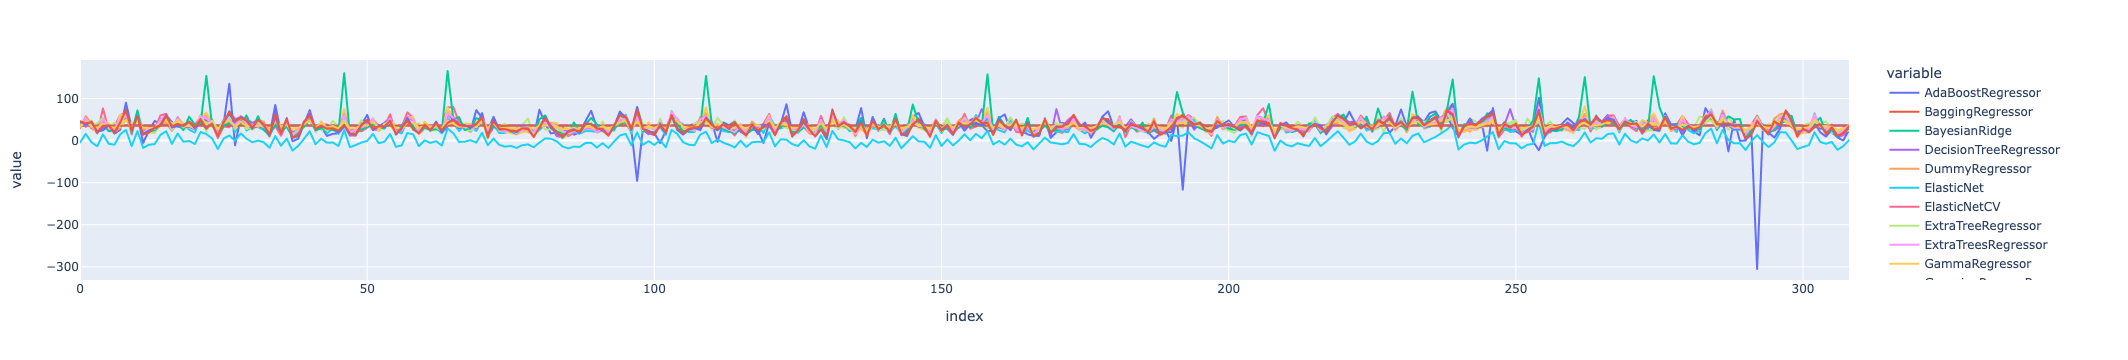

In [73]:
fig = px.line(predictions)
fig.show()

In [92]:
lams = np.logspace(-3,3,3)

In [93]:
lams = [lams]*len(X_train.columns)

In [94]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), fit_intercept=True)

In [95]:
# Genere un primer modelo sin implementar la función gridsearch.
gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [96]:
def report_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    print(f'Test R2: {r2_score(y_test, preds)}')
    print(f'Test MSE: {mean_squared_error(y_test,preds)}')
    print(f'Test Median Absolute Error: {median_absolute_error(y_test, preds)}')

In [97]:
print(f'Metricas para el primer modelo entregado con lambda: {gam.lam}\n')
report_metrics(gam,X_test, y_test)

Metricas para el primer modelo entregado con lambda: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]

Test R2: 0.8823821965748799
Test MSE: 32.291399253504025
Test Median Absolute Error: 3.550454844374414


In [98]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.4099
Link Function:                     IdentityLink Log Likelihood:                                 -3010.8148
Number of Samples:                          721 AIC:                                             6184.4494
                                                AICc:                                            6205.4613
                                                GCV:                                               31.8431
                                                Scale:                                             25.5221
                                                Pseudo R-Squared:                                   0.9192
Feature Function                  Lam

In [99]:
# Genere un segundo modelo implementando gridsearch
gam_2 = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), fit_intercept=True)
gam_2.gridsearch(X_train.values, y_train.values, lam = lams)

100% (6561 of 6561) |####################| Elapsed Time: 0:07:10 Time:  0:07:10


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [101]:
print(f'Metricas para el segundo modelo entregado con lambda: {gam_2.lam}\n')
report_metrics(gam_2,X_test, y_test)

Metricas para el segundo modelo entregado con lambda: [[0.001], [0.001], [1.0], [0.001], [1.0], [1.0], [0.001], [0.001]]

Test R2: 0.857571780775549
Test MSE: 39.1029789539504
Test Median Absolute Error: 3.7361090679448967


In [102]:
gam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    104.7711
Link Function:                     IdentityLink Log Likelihood:                                 -2914.5781
Number of Samples:                          721 AIC:                                             6040.6983
                                                AICc:                                            6077.4706
                                                GCV:                                               30.0297
                                                Scale:                                             22.2937
                                                Pseudo R-Squared:                                   0.9321
Feature Function                  Lam

El segundo modelo presenta mejores resultados que el segundo mediante gridsearch

## Ejercicio 4: Dependencia Parcial

● En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.

● Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.

● Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

In [103]:
def dependencia_parcial(model):
    fig, axs = plt.subplots(2,4, figsize = (20,6));
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = model.generate_X_grid(term=i)
        ax.plot(XX[:,i], model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:,i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]],
               [0] * len(X_train[titles[i]]),
               marker = '|', alpha = .5)
        ax.set_title(titles[i]);

In [106]:
report_metrics(gam, X_test, y_test)

Test R2: 0.8823821965748799
Test MSE: 32.291399253504025
Test Median Absolute Error: 3.550454844374414


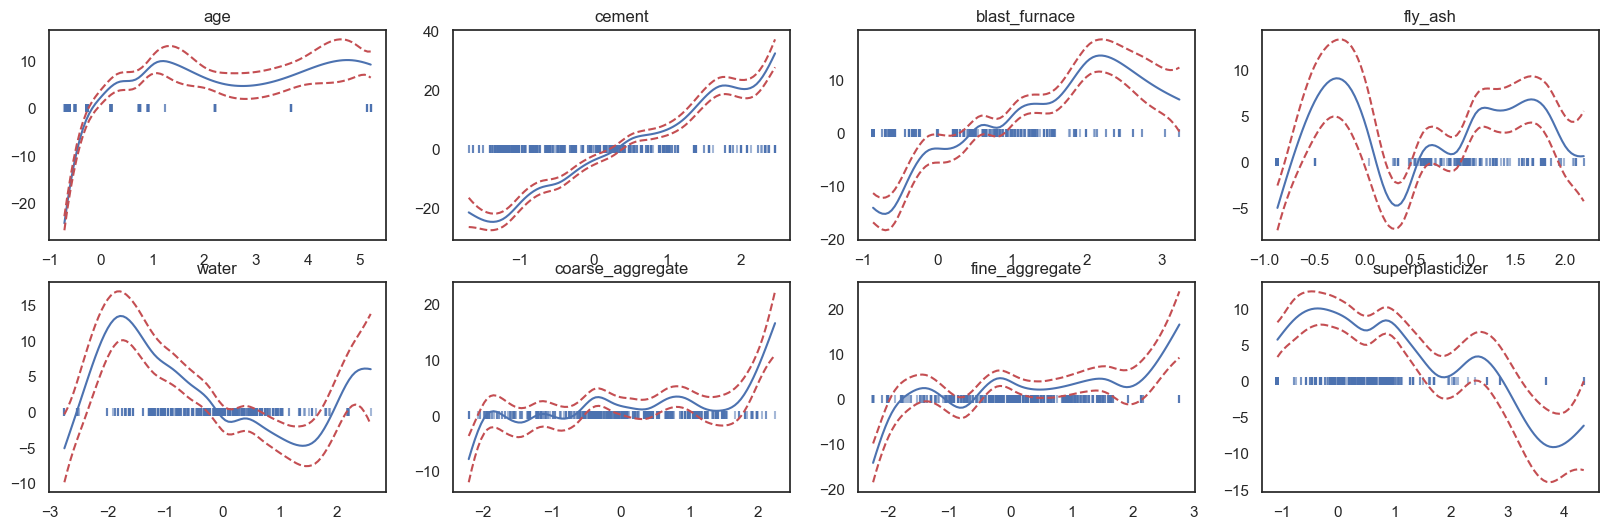

In [107]:
# dependencias parciales del primer modelo (gam sin gridsearch)
dependencia_parcial(gam)

In [108]:
report_metrics(gam_2, X_test, y_test)

Test R2: 0.857571780775549
Test MSE: 39.1029789539504
Test Median Absolute Error: 3.7361090679448967


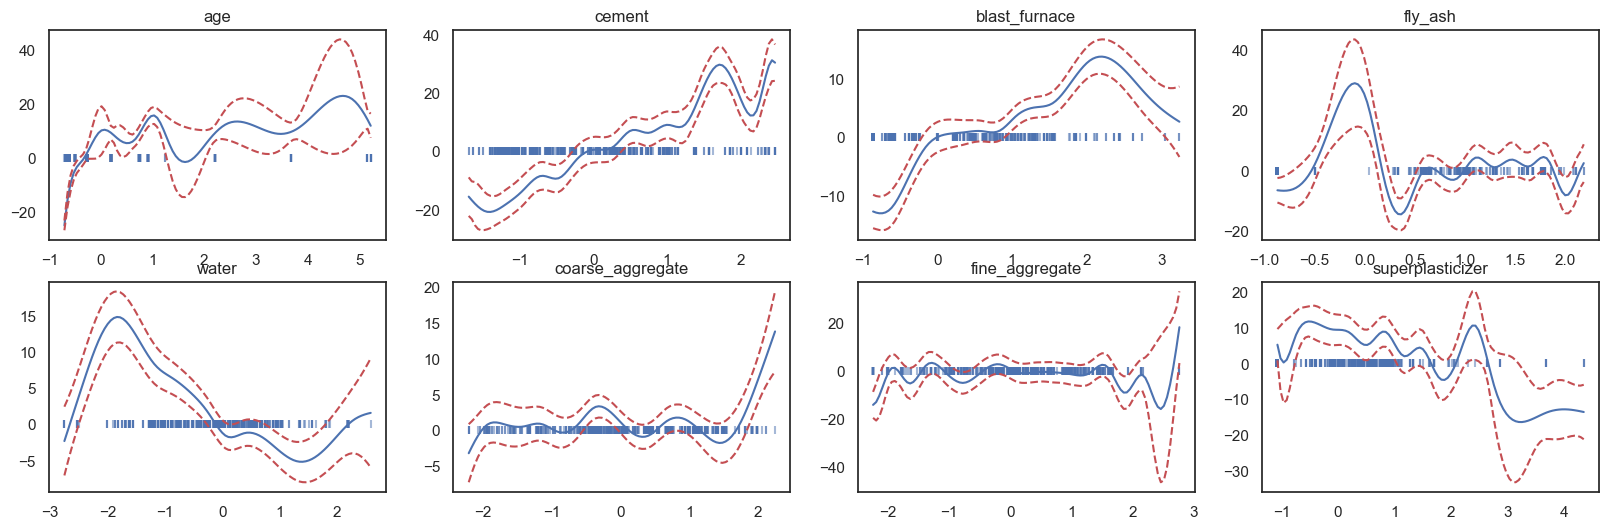

In [109]:
# dependencias parciales del segundo modelo (gam con gridsearch)
dependencia_parcial(gam_2)